In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv']

#### Clean df and combine into 1

In [3]:
data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths:
    print(path)
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.drop([0,1,2,3,4])

    print(data_RFID_int.shape)
    
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    
    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['RFID_datetime_start'] = [x.replace(year = 2020) - dt.timedelta(days = 2) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['RFID_date'] = data_RFID_int['RFID_datetime_start'].dt.date 
    data_RFID_int['RFID_day'] = data_RFID_int['RFID_datetime_start'].dt.day 
    data_RFID_int['RFID_time_start'] = [x.split(' ')[1] for x in data_RFID_int['RFID_datetime_start'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['RFID_hour'] = data_RFID_int['RFID_datetime_start'].dt.hour
    data_RFID_int['RFID_min'] = data_RFID_int['RFID_datetime_start'].dt.minute

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')

#clean columns
data_RFID = data_RFID[['IdRFID', 'unitLabel', 'eventDuration',
       'RFID_datetime_start', 'RFID_date',
       'RFID_day', 'RFID_time_start', 'RFID_hour', 'RFID_min']]
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv
(12969, 14)
(12968, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv
(22276, 14)
(35243, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv
(16273, 14)
(51515, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv
(6509, 14)
(58023, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv
(3845, 14)
(61867, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv
(5844, 14)
(67710, 21) 



,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min
5,041A555C80,RFID3,2.429,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55
6,041A555C80,RFID3,5.377,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55
7,041A555C80,RFID4,0.886,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55
8,041A555C80,RFID4,0.342,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55
9,041A555C80,RFID2,0.445,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55


#### Compute endtime 

In [4]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['RFID_datetime_end'] = data_RFID.apply(lambda row: add_duration(row['RFID_datetime_start'], row['eventDuration']), axis=1)
data_RFID['RFID_time_end'] = [x.split(' ')[1] for x in data_RFID['RFID_datetime_end'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(67710, 11)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_datetime_end,RFID_time_end
5,041A555C80,RFID3,2.429,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55,2020-10-04 16:55:16.822020800,16:55:16
6,041A555C80,RFID3,5.377,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55,2020-10-04 16:55:23.984008000,16:55:23
7,041A555C80,RFID4,0.886,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55,2020-10-04 16:55:28.875011200,16:55:28
8,041A555C80,RFID4,0.342,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55,2020-10-04 16:55:30.304041599,16:55:30
9,041A555C80,RFID2,0.445,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55,2020-10-04 16:55:39.502974400,16:55:39


#### Add next column (do for each unitLabel separately)

In [5]:
#column for if next is same Id
def next_compare(a, b):
    if a == b:
        compare = 'same'
        
    if a != b:
        compare = 'diff'

    return compare

data_RFID_next = pd.DataFrame()

for unitlabel in data_RFID['unitLabel'].unique():
    print(unitlabel)

    data_int = data_RFID[data_RFID['unitLabel'] == unitlabel].sort_values(['RFID_datetime_start'])
    data_int['RFID_datetime_start_next'] = data_int['RFID_datetime_start'].shift(-1)
    data_int['IdRFID_next'] = data_int['IdRFID'].shift(-1)
    
    data_int['IdRFID_diff_next'] = data_int.apply(lambda row: next_compare(row['IdRFID'], row['IdRFID_next']), axis=1)

    if data_RFID_next.empty:
        data_RFID_next = data_int
    else:
        data_RFID_next = pd.concat([data_RFID_next, data_int], axis=0)

data_RFID_next['time_diff_next'] = (data_RFID_next['RFID_datetime_start_next'] - data_RFID_next['RFID_datetime_end'])
data_RFID_next['time_diff_next'] = [x.total_seconds() for x in data_RFID_next['time_diff_next']]

data_RFID_next.head()

RFID3
RFID4
RFID2
RFID1


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next
39,041A555BCC,RFID3,1.460,2020-09-11 11:19:42.993004800,2020-09-11,11,11:19:42,11,19,2020-09-11 11:19:44.453004800,11:19:44,2020-09-11 11:20:53.106000000,041A555BCC,same,68.652995
40,041A555BCC,RFID3,4.350,2020-09-11 11:20:53.106000000,2020-09-11,11,11:20:53,11,20,2020-09-11 11:20:57.456000000,11:20:57,2020-09-11 11:23:31.367990400,041A555BCC,same,153.911990
42,041A555BCC,RFID3,4.182,2020-09-11 11:23:31.367990400,2020-09-11,11,11:23:31,11,23,2020-09-11 11:23:35.549990400,11:23:35,2020-09-11 11:24:31.229020800,041A555BCC,same,55.679030
45,041A555BCC,RFID3,0.146,2020-09-11 11:24:31.229020800,2020-09-11,11,11:24:31,11,24,2020-09-11 11:24:31.375020800,11:24:31,2020-09-11 11:25:44.756976000,041A555D59,diff,73.381955
47,041A555D59,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046


#### Add light dark

In [6]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_RFID_next['ld_seg'] = data_RFID_next['RFID_hour'].apply(assign_ld)

print(data_RFID_next.shape)
data_RFID_next.head()

(67710, 16)


,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld_seg
39,041A555BCC,RFID3,1.460,2020-09-11 11:19:42.993004800,2020-09-11,11,11:19:42,11,19,2020-09-11 11:19:44.453004800,11:19:44,2020-09-11 11:20:53.106000000,041A555BCC,same,68.652995,light
40,041A555BCC,RFID3,4.350,2020-09-11 11:20:53.106000000,2020-09-11,11,11:20:53,11,20,2020-09-11 11:20:57.456000000,11:20:57,2020-09-11 11:23:31.367990400,041A555BCC,same,153.911990,light
42,041A555BCC,RFID3,4.182,2020-09-11 11:23:31.367990400,2020-09-11,11,11:23:31,11,23,2020-09-11 11:23:35.549990400,11:23:35,2020-09-11 11:24:31.229020800,041A555BCC,same,55.679030,light
45,041A555BCC,RFID3,0.146,2020-09-11 11:24:31.229020800,2020-09-11,11,11:24:31,11,24,2020-09-11 11:24:31.375020800,11:24:31,2020-09-11 11:25:44.756976000,041A555D59,diff,73.381955,light
47,041A555D59,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,light


#### Map unitLabel and bottle contents

In [7]:
unitLabel_map = {'RFID1': 'RFID_10',
                 'RFID2': 'RFID_05',
                 'RFID3': 'RFID_20',
                 'RFID4': 'RFID_H20'}

data_RFID_next['unitLabel_drink'] = data_RFID_next['unitLabel'].map(unitLabel_map)
print(data_RFID_next.shape)

(67710, 17)


#### Add metadata and clean

In [8]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_1m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID_next.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 25)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld_seg,unitLabel_drink
0,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,47,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,light,RFID_20
1,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,48,RFID3,5.776,2020-09-11 11:25:49.360022400,2020-09-11,11,11:25:49,11,25,2020-09-11 11:25:55.136022400,11:25:55,2020-09-11 11:38:40.135977600,041A555D59,same,764.999955,light,RFID_20
2,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,67,RFID3,0.264,2020-09-11 11:38:40.135977600,2020-09-11,11,11:38:40,11,38,2020-09-11 11:38:40.399977600,11:38:40,2020-09-11 11:38:41.516995200,041A555D59,same,1.117017,light,RFID_20
3,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,68,RFID3,1.350,2020-09-11 11:38:41.516995200,2020-09-11,11,11:38:41,11,38,2020-09-11 11:38:42.866995200,11:38:42,2020-09-11 11:38:44.880979200,041A555D59,same,2.013984,light,RFID_20
4,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,69,RFID3,0.075,2020-09-11 11:38:44.880979200,2020-09-11,11,11:38:44,11,38,2020-09-11 11:38:44.955979200,11:38:44,2020-09-11 11:42:09.192009600,041A555BCC,diff,204.236030,light,RFID_20


#### Add day, hour, and min counts

In [9]:
#split by round to get specific dates
data_RFID_r1 = data_RFID_final[data_RFID_final['Round'] == 1]
data_RFID_r2 = data_RFID_final[data_RFID_final['Round'] == 2]
data_RFID_r3 = data_RFID_final[data_RFID_final['Round'] == 3]
data_RFID_r4 = data_RFID_final[data_RFID_final['Round'] == 4]

#column of running day count
dat_map = dict(zip(data_RFID_r1['RFID_date'].unique(), np.arange(1,len(data_RFID_r1['RFID_date'].unique())+1)))
data_RFID_r1['RFID_day_count'] = data_RFID_r1['RFID_date'].map(dat_map)
#column of running hour and minute count
data_RFID_r1['RFID_hour_count'] = (data_RFID_r1['RFID_day_count']*24) + data_RFID_r1['RFID_hour'] - 24
data_RFID_r1['RFID_min_count'] = (data_RFID_r1['RFID_hour_count']*60) + data_RFID_r1['RFID_min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r2['RFID_date'].unique(), np.arange(1,len(data_RFID_r2['RFID_date'].unique())+1)))
data_RFID_r2['RFID_day_count'] = data_RFID_r2['RFID_date'].map(dat_map)
#column of running hour and minute count
data_RFID_r2['RFID_hour_count'] = (data_RFID_r2['RFID_day_count']*24) + data_RFID_r2['RFID_hour'] - 24
data_RFID_r2['RFID_min_count'] = (data_RFID_r2['RFID_hour_count']*60) + data_RFID_r2['RFID_min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r3['RFID_date'].unique(), np.arange(1,len(data_RFID_r3['RFID_date'].unique())+1)))
data_RFID_r3['RFID_day_count'] = data_RFID_r3['RFID_date'].map(dat_map)
#column of running hour and minute count
data_RFID_r3['RFID_hour_count'] = (data_RFID_r3['RFID_day_count']*24) + data_RFID_r3['RFID_hour'] - 24
data_RFID_r3['RFID_min_count'] = (data_RFID_r3['RFID_hour_count']*60) + data_RFID_r3['RFID_min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r4['RFID_date'].unique(), np.arange(1,len(data_RFID_r4['RFID_date'].unique())+1)))
data_RFID_r4['RFID_day_count'] = data_RFID_r4['RFID_date'].map(dat_map)
#column of running hour and minute count
data_RFID_r4['RFID_hour_count'] = (data_RFID_r4['RFID_day_count']*24) + data_RFID_r4['RFID_hour'] - 24
data_RFID_r4['RFID_min_count'] = (data_RFID_r4['RFID_hour_count']*60) + data_RFID_r4['RFID_min'] - 60

#combine back together
data_RFID_final = pd.concat([data_RFID_r1, data_RFID_r2, data_RFID_r3, data_RFID_r4], axis=0)
print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 28)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld_seg,unitLabel_drink,RFID_day_count,RFID_hour_count,RFID_min_count
0,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,47,RFID3,1.191,2020-09-11 11:25:44.756976000,2020-09-11,11,11:25:44,11,25,2020-09-11 11:25:45.947976000,11:25:45,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,light,RFID_20,1,11,625
1,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,48,RFID3,5.776,2020-09-11 11:25:49.360022400,2020-09-11,11,11:25:49,11,25,2020-09-11 11:25:55.136022400,11:25:55,2020-09-11 11:38:40.135977600,041A555D59,same,764.999955,light,RFID_20,1,11,625
2,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,67,RFID3,0.264,2020-09-11 11:38:40.135977600,2020-09-11,11,11:38:40,11,38,2020-09-11 11:38:40.399977600,11:38:40,2020-09-11 11:38:41.516995200,041A555D59,same,1.117017,light,RFID_20,1,11,638
3,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,68,RFID3,1.350,2020-09-11 11:38:41.516995200,2020-09-11,11,11:38:41,11,38,2020-09-11 11:38:42.866995200,11:38:42,2020-09-11 11:38:44.880979200,041A555D59,same,2.013984,light,RFID_20,1,11,638
4,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,69,RFID3,0.075,2020-09-11 11:38:44.880979200,2020-09-11,11,11:38:44,11,38,2020-09-11 11:38:44.955979200,11:38:44,2020-09-11 11:42:09.192009600,041A555BCC,diff,204.236030,light,RFID_20,1,11,638


In [10]:
data_RFID_final = data_RFID_final[['Round', 'Cage', 'Animal', 'Injury', 'IdRFID', 'weight_pre', 
                                   'unitLabel', 'unitLabel_drink', 'eventDuration',
                                   'RFID_datetime_start', 'RFID_datetime_end',
                                   'RFID_datetime_start_next', 'IdRFID_next', 'IdRFID_diff_next', 'time_diff_next',
                                   'RFID_time_start', 'RFID_time_end',
                                   'RFID_date', 'RFID_day', 'ld_seg', 'RFID_hour', 'RFID_min', 
                                   'RFID_day_count', 'RFID_hour_count', 'RFID_min_count']]

print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 25)


,Round,Cage,Animal,Injury,IdRFID,weight_pre,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld_seg,RFID_hour,RFID_min,RFID_day_count,RFID_hour_count,RFID_min_count
0,1,2,1028,blast,041A555D59,28.6,RFID3,RFID_20,1.191,2020-09-11 11:25:44.756976000,2020-09-11 11:25:45.947976000,2020-09-11 11:25:49.360022400,041A555D59,same,3.412046,11:25:44,11:25:45,2020-09-11,11,light,11,25,1,11,625
1,1,2,1028,blast,041A555D59,28.6,RFID3,RFID_20,5.776,2020-09-11 11:25:49.360022400,2020-09-11 11:25:55.136022400,2020-09-11 11:38:40.135977600,041A555D59,same,764.999955,11:25:49,11:25:55,2020-09-11,11,light,11,25,1,11,625
2,1,2,1028,blast,041A555D59,28.6,RFID3,RFID_20,0.264,2020-09-11 11:38:40.135977600,2020-09-11 11:38:40.399977600,2020-09-11 11:38:41.516995200,041A555D59,same,1.117017,11:38:40,11:38:40,2020-09-11,11,light,11,38,1,11,638
3,1,2,1028,blast,041A555D59,28.6,RFID3,RFID_20,1.350,2020-09-11 11:38:41.516995200,2020-09-11 11:38:42.866995200,2020-09-11 11:38:44.880979200,041A555D59,same,2.013984,11:38:41,11:38:42,2020-09-11,11,light,11,38,1,11,638
4,1,2,1028,blast,041A555D59,28.6,RFID3,RFID_20,0.075,2020-09-11 11:38:44.880979200,2020-09-11 11:38:44.955979200,2020-09-11 11:42:09.192009600,041A555BCC,diff,204.236030,11:38:44,11:38:44,2020-09-11,11,light,11,38,1,11,638


### VDM data

#### Get paths for files to process

In [13]:
#create list of dir paths
VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m'
    
VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)
    
VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.201002.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200925.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200911.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200918.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv']

#### Clean df and combine into 1

In [14]:
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths:
    print(path)
    
    data_VDM_int = pd.read_csv(path)
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    print(data_VDM_int.shape)
    
    #add info from file name
    data_VDM_int['Cohort'] = path.split('/')[-2].split('.')[0]
    data_VDM_int['TP'] = path.split('/')[-2].split('.')[1]
    data_VDM_int['Drink'] = path.split('/')[-1].split('.')[0]
    data_VDM_int['StartDate'] = path.split('/')[-1].split('.')[1]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')
    
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.201002.1m.csv
(216584, 11)
(216584, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv
(423774, 11)
(640358, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200925.1m.csv
(340059, 11)
(980417, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200911.1m.csv
(241967, 11)
(1222384, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200918.1m.csv
(302272, 11)
(1524656, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv
(533853, 11)
(2058509, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv
(511519, 11)
(2570028, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv
(440884, 11)
(3010912, 15) 



,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml).1,Drinking Accum (ml).1,Drinking (ml).2,Drinking Accum (ml).2,Drinking (ml).3,Drinking Accum (ml).3,Cohort,TP,Drink,StartDate
0,0,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
1,0,2,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
2,1,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
3,1,2,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
4,2,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002


#### Clean up column names

In [15]:
data_VDM.columns = ['Int', 'Cage_VDM', 'VDM_Time', 
                    'VDM_10', 'VDM_1_accum',
                    'VDM_05', 'VDM_2_accum', 
                    'VDM_20', 'VDM_3_accum', 
                    'VDM_H20', 'VDM_4_accum',
                    'Cohort', 'TP', 'Drink', 'StartDate']

data_VDM = data_VDM[['Cage_VDM', 'Cohort', 'TP', 'Drink', 'StartDate', 'VDM_Time', 'VDM_10', 'VDM_05', 'VDM_20', 'VDM_H20']]

data_VDM.tail()

,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,VDM_10,VDM_05,VDM_20,VDM_H20
440879,2,r1,1m,etoh,200921,09/25/20 13:32:04,0.0,0.0,0.0,0.0
440880,1,r1,1m,etoh,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440881,2,r1,1m,etoh,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440882,1,r1,1m,etoh,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0
440883,2,r1,1m,etoh,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0


#### Convert liquid vol to etoh vol

In [16]:
data_VDM['VDM_10_etoh'] = data_VDM['VDM_10']*.1
data_VDM['VDM_20_etoh'] = data_VDM['VDM_20']*.2
data_VDM['VDM_05_etoh'] = data_VDM['VDM_05']*.05

#### Make into tidy df

In [17]:
#melt dataframe (new column of parameters)

meta_params = ['Cage_VDM', 'Cohort', 'TP', 'Drink', 'StartDate', 'VDM_Time']
intake_params = ['VDM_10_etoh', 'VDM_05_etoh', 'VDM_20_etoh', 'VDM_H20']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(12043648, 8)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value
0,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
1,2,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
2,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
3,2,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
4,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0


#### Drop times with no intake data

In [18]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0]
print(data_VDM_tidy_intake.shape)

data_VDM_tidy_intake = data_VDM_tidy_intake[data_VDM_tidy_intake['Drink'] == 'etoh']
print(data_VDM_tidy_intake.shape)

data_VDM_tidy_intake.head()

(40961, 8)
(7635, 8)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value
224829,2,r1,1m,etoh,200928,09/28/20 19:15:02,VDM_10_etoh,0.0024
224831,2,r1,1m,etoh,200928,09/28/20 19:15:03,VDM_10_etoh,0.0024
224833,2,r1,1m,etoh,200928,09/28/20 19:15:05,VDM_10_etoh,0.0024
224837,2,r1,1m,etoh,200928,09/28/20 19:15:08,VDM_10_etoh,0.0024
224845,2,r1,1m,etoh,200928,09/28/20 19:15:15,VDM_10_etoh,0.0024


#### Clean up datetime

In [19]:
#clean up and create datetime columns
data_VDM_tidy_intake['VDM_datetime'] = pd.to_datetime(data_VDM_tidy_intake['VDM_Time'])
data_VDM_tidy_intake['VDM_timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['VDM_datetime']]

data_VDM_tidy_intake['VDM_date'] = data_VDM_tidy_intake['VDM_datetime'].dt.date
data_VDM_tidy_intake['VDM_day'] = data_VDM_tidy_intake['VDM_datetime'].dt.day
data_VDM_tidy_intake['VDM_time'] = data_VDM_tidy_intake['VDM_datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['VDM_hour'] = data_VDM_tidy_intake['VDM_datetime'].dt.hour
data_VDM_tidy_intake['VDM_min'] = data_VDM_tidy_intake['VDM_datetime'].dt.minute

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(7635, 15)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min
224829,2,r1,1m,etoh,200928,09/28/20 19:15:02,VDM_10_etoh,0.0024,2020-09-28 19:15:02,1.601321e+09,2020-09-28,28,19:15:02,19,15
224831,2,r1,1m,etoh,200928,09/28/20 19:15:03,VDM_10_etoh,0.0024,2020-09-28 19:15:03,1.601321e+09,2020-09-28,28,19:15:03,19,15
224833,2,r1,1m,etoh,200928,09/28/20 19:15:05,VDM_10_etoh,0.0024,2020-09-28 19:15:05,1.601321e+09,2020-09-28,28,19:15:05,19,15
224837,2,r1,1m,etoh,200928,09/28/20 19:15:08,VDM_10_etoh,0.0024,2020-09-28 19:15:08,1.601321e+09,2020-09-28,28,19:15:08,19,15
224845,2,r1,1m,etoh,200928,09/28/20 19:15:15,VDM_10_etoh,0.0024,2020-09-28 19:15:15,1.601321e+09,2020-09-28,28,19:15:15,19,15


#### Add light dark and clean

In [20]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['VDM_hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg
224829,2,r1,1m,etoh,200928,09/28/20 19:15:02,VDM_10_etoh,0.0024,2020-09-28 19:15:02,1.601321e+09,2020-09-28,28,19:15:02,19,15,dark
224831,2,r1,1m,etoh,200928,09/28/20 19:15:03,VDM_10_etoh,0.0024,2020-09-28 19:15:03,1.601321e+09,2020-09-28,28,19:15:03,19,15,dark
224833,2,r1,1m,etoh,200928,09/28/20 19:15:05,VDM_10_etoh,0.0024,2020-09-28 19:15:05,1.601321e+09,2020-09-28,28,19:15:05,19,15,dark
224837,2,r1,1m,etoh,200928,09/28/20 19:15:08,VDM_10_etoh,0.0024,2020-09-28 19:15:08,1.601321e+09,2020-09-28,28,19:15:08,19,15,dark
224845,2,r1,1m,etoh,200928,09/28/20 19:15:15,VDM_10_etoh,0.0024,2020-09-28 19:15:15,1.601321e+09,2020-09-28,28,19:15:15,19,15,dark


### Filter RFID data by VDM times for Cage 2 only (only 1 mouse in cage 1)

In [21]:
data_VDM_tidy_intake_c2 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM'] == 2].sort_values(['variable', 'VDM_datetime']).reset_index(drop=True)
data_VDM_tidy_intake_c2.head()

,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg
0,2,r1,1m,etoh,200913,09/14/20 19:27:05,VDM_05_etoh,0.0055,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,dark
1,2,r1,1m,etoh,200913,09/14/20 19:27:06,VDM_05_etoh,0.0033,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,dark
2,2,r1,1m,etoh,200913,09/16/20 03:53:05,VDM_05_etoh,0.0011,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,dark
3,2,r1,1m,etoh,200913,09/16/20 03:53:07,VDM_05_etoh,0.0044,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,dark
4,2,r1,1m,etoh,200913,09/16/20 20:35:13,VDM_05_etoh,0.0055,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,dark


In [22]:
data_RFID_final= data_RFID_final.sort_values(['unitLabel_drink', 'RFID_datetime_start']).reset_index(drop=True)
data_RFID_final.head()

,Round,Cage,Animal,Injury,IdRFID,weight_pre,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld_seg,RFID_hour,RFID_min,RFID_day_count,RFID_hour_count,RFID_min_count
0,1,2,1028,blast,041A555D59,28.6,RFID2,RFID_05,0.952,2020-09-11 11:02:35.890022400,2020-09-11 11:02:36.842022400,2020-09-11 11:02:38.055984000,041A555D59,same,1.213961,11:02:35,11:02:36,2020-09-11,11,light,11,2,1,11,602
1,1,2,1028,blast,041A555D59,28.6,RFID2,RFID_05,0.143,2020-09-11 11:02:38.055984000,2020-09-11 11:02:38.198984000,2020-09-11 11:02:39.285024000,041A555D59,same,1.086040,11:02:38,11:02:38,2020-09-11,11,light,11,2,1,11,602
2,1,2,1028,blast,041A555D59,28.6,RFID2,RFID_05,1.530,2020-09-11 11:02:39.285024000,2020-09-11 11:02:40.815024000,2020-09-11 11:07:14.459001600,041A555D59,same,273.643977,11:02:39,11:02:40,2020-09-11,11,light,11,2,1,11,602
3,1,2,1028,blast,041A555D59,28.6,RFID2,RFID_05,0.075,2020-09-11 11:07:14.459001600,2020-09-11 11:07:14.534001600,2020-09-11 11:07:36.140044800,041A555BCC,diff,21.606043,11:07:14,11:07:14,2020-09-11,11,light,11,7,1,11,607
4,1,2,1029,blast,041A555BCC,27.8,RFID2,RFID_05,0.228,2020-09-11 11:07:36.140044800,2020-09-11 11:07:36.368044800,2020-09-11 11:12:05.477961600,041A555BCC,same,269.109916,11:07:36,11:07:36,2020-09-11,11,light,11,7,1,11,607


In [23]:
data_comb = data_VDM_tidy_intake_c2
RFID_data = data_RFID_final

VDM_RFID_mapping = {'VDM_10_etoh': 'RFID_10',
                   'VDM_05_etoh': 'RFID_05',
                   'VDM_20_etoh': 'RFID_20',
                   'VDM_H20': 'RFID_H20'}

RFID_eventDuration = []
RFID_assign_id_pre = []
RFID_assign_var_pre = []
RFID_datetime_start_pre = []
RFID_datetime_end_pre = []
RFID_datetime_start_next = []
IdRFID_next = []
IdRFID_diff_next = []
time_diff_next = []

for index, row in data_comb.iterrows():

    #find RFID signal start time closest to VDM time before
    try:
        int_assign = RFID_data[(RFID_data['Cage'] == row['Cage_VDM']) & #match cage
                               (RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & #match tube
                               (RFID_data['RFID_datetime_start'] <= row['VDM_datetime']) #find closest datetime
                              ].sort_values(['RFID_datetime_start']).iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_id_pre.append(int_assign['IdRFID'])
        RFID_assign_var_pre.append(int_assign['unitLabel'])
        RFID_datetime_start_pre.append(int_assign['RFID_datetime_start'])
        RFID_datetime_end_pre.append(int_assign['RFID_datetime_end'])
        RFID_datetime_start_next.append(int_assign['RFID_datetime_start_next'])
        IdRFID_next.append(int_assign['IdRFID_next'])
        IdRFID_diff_next.append(int_assign['IdRFID_diff_next'])
        time_diff_next.append(int_assign['time_diff_next'])
        
    except:
        print(index, 'pre')
        RFID_eventDuration.append(np.nan)
        RFID_assign_id_pre.append(np.nan)
        RFID_assign_var_pre.append(np.nan)
        RFID_datetime_start_pre.append(np.nan)
        RFID_datetime_end_pre.append(np.nan)
        RFID_datetime_start_next.append(np.nan)
        IdRFID_next.append(np.nan)
        IdRFID_diff_next.append(np.nan)
        time_diff_next.append(np.nan)
        
data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_id_pre'] = RFID_assign_id_pre
data_comb['RFID_assign_var_pre'] = RFID_assign_var_pre
data_comb['RFID_datetime_start_pre'] = RFID_datetime_start_pre
data_comb['RFID_datetime_end_pre'] = RFID_datetime_end_pre
data_comb['RFID_datetime_start_next'] = RFID_datetime_start_next
data_comb['IdRFID_next'] = IdRFID_next
data_comb['IdRFID_diff_next'] = IdRFID_diff_next
data_comb['time_diff_next'] = time_diff_next

print(data_comb.shape)
data_comb.head()

(5676, 25)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next
0,2,r1,1m,etoh,200913,09/14/20 19:27:05,VDM_05_etoh,0.0055,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,dark,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950
1,2,r1,1m,etoh,200913,09/14/20 19:27:06,VDM_05_etoh,0.0033,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,dark,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950
2,2,r1,1m,etoh,200913,09/16/20 03:53:05,VDM_05_etoh,0.0011,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,dark,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972
3,2,r1,1m,etoh,200913,09/16/20 03:53:07,VDM_05_etoh,0.0044,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,dark,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972
4,2,r1,1m,etoh,200913,09/16/20 20:35:13,VDM_05_etoh,0.0055,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,dark,0.075,041A555BCC,RFID2,2020-09-16 20:34:04.955001600,2020-09-16 20:34:05.030001600,2020-09-16 20:51:41.146963200,041A555BCC,same,1056.116961


In [24]:
def time_within(RFID_start, RFID_stop, VDM_time):
    
    if (VDM_time >= RFID_start) & (VDM_time <= RFID_stop):
        return 0
    
    elif (VDM_time >= RFID_start) & (VDM_time >= RFID_stop):
        time_within = VDM_time - RFID_stop
        time_within = time_within.total_seconds()
        return time_within
    
data_comb['VDM_RFID_timediff'] = data_comb.apply(lambda row: time_within(row['RFID_datetime_start_pre'], 
                                                                   row['RFID_datetime_end_pre'],
                                                                   row['VDM_datetime']), axis=1)

data_comb.head()

,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff
0,2,r1,1m,etoh,200913,09/14/20 19:27:05,VDM_05_etoh,0.0055,2020-09-14 19:27:05,1.600112e+09,2020-09-14,14,19:27:05,19,27,dark,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,20883.682972
1,2,r1,1m,etoh,200913,09/14/20 19:27:06,VDM_05_etoh,0.0033,2020-09-14 19:27:06,1.600112e+09,2020-09-14,14,19:27:06,19,27,dark,0.086,041A555D59,RFID2,2020-09-14 13:39:01.231027200,2020-09-14 13:39:01.317027200,2020-09-14 20:21:11.725977600,041A555D59,same,24130.408950,20884.682972
2,2,r1,1m,etoh,200913,09/16/20 03:53:05,VDM_05_etoh,0.0011,2020-09-16 03:53:05,1.600228e+09,2020-09-16,16,03:53:05,3,53,dark,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,6476.051979
3,2,r1,1m,etoh,200913,09/16/20 03:53:07,VDM_05_etoh,0.0044,2020-09-16 03:53:07,1.600228e+09,2020-09-16,16,03:53:07,3,53,dark,0.717,041A555BCC,RFID2,2020-09-16 02:05:08.231020800,2020-09-16 02:05:08.948020800,2020-09-16 04:02:47.337993599,041A555D59,diff,7058.389972,6478.051979
4,2,r1,1m,etoh,200913,09/16/20 20:35:13,VDM_05_etoh,0.0055,2020-09-16 20:35:13,1.600289e+09,2020-09-16,16,20:35:13,20,35,dark,0.075,041A555BCC,RFID2,2020-09-16 20:34:04.955001600,2020-09-16 20:34:05.030001600,2020-09-16 20:51:41.146963200,041A555BCC,same,1056.116961,67.969998


(5676, 26)


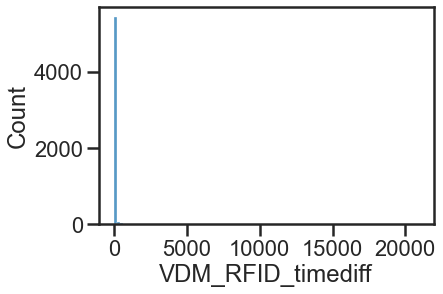

In [25]:
print(data_comb.shape)
sns.histplot(data_comb['VDM_RFID_timediff'], bins=100)
plt.show()

#### Map RFIDs for Cage 1 by date

In [29]:
data_VDM_tidy_intake_c1 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM'] == 1]

RFID_date_map = {'200913': '041A555768',
                 '200921': '041A555A78',
                 '200928': '041A555996',
                 '201004': '041A55564D'}

data_VDM_tidy_intake_c1['RFID_assign_id_pre'] = data_VDM_tidy_intake_c1['StartDate'].map(RFID_date_map)
print(data_VDM_tidy_intake_c1.shape)

data_VDM_tidy_intake_c1.head()

(1959, 17)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_assign_id_pre
226886,1,r1,1m,etoh,200928,09/28/20 19:42:20,VDM_10_etoh,0.0022,2020-09-28 19:42:20,1.601322e+09,2020-09-28,28,19:42:20,19,42,dark,041A555996
226888,1,r1,1m,etoh,200928,09/28/20 19:42:22,VDM_10_etoh,0.0022,2020-09-28 19:42:22,1.601322e+09,2020-09-28,28,19:42:22,19,42,dark,041A555996
226892,1,r1,1m,etoh,200928,09/28/20 19:42:25,VDM_10_etoh,0.0022,2020-09-28 19:42:25,1.601322e+09,2020-09-28,28,19:42:25,19,42,dark,041A555996
226896,1,r1,1m,etoh,200928,09/28/20 19:42:28,VDM_10_etoh,0.0022,2020-09-28 19:42:28,1.601322e+09,2020-09-28,28,19:42:28,19,42,dark,041A555996
239122,1,r1,1m,etoh,200928,09/28/20 22:24:40,VDM_10_etoh,0.0022,2020-09-28 22:24:40,1.601332e+09,2020-09-28,28,22:24:40,22,24,dark,041A555996


In [30]:
#combine back together
data_comb = pd.concat([data_comb, data_VDM_tidy_intake_c1], axis=0)
print(data_comb.shape)
data_comb.tail()

(7635, 26)


,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff
12030686,1,r1,1m,etoh,200921,09/25/20 10:40:11,VDM_H20,0.027,2020-09-25 10:40:11,1.601030e+09,2020-09-25,25,10:40:11,10,40,light,NaN,041A555A78,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
12030688,1,r1,1m,etoh,200921,09/25/20 10:40:13,VDM_H20,0.054,2020-09-25 10:40:13,1.601030e+09,2020-09-25,25,10:40:13,10,40,light,NaN,041A555A78,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
12030690,1,r1,1m,etoh,200921,09/25/20 10:40:14,VDM_H20,0.027,2020-09-25 10:40:14,1.601030e+09,2020-09-25,25,10:40:14,10,40,light,NaN,041A555A78,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
12030694,1,r1,1m,etoh,200921,09/25/20 10:40:17,VDM_H20,0.027,2020-09-25 10:40:17,1.601030e+09,2020-09-25,25,10:40:17,10,40,light,NaN,041A555A78,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
12030700,1,r1,1m,etoh,200921,09/25/20 10:40:22,VDM_H20,0.027,2020-09-25 10:40:22,1.601030e+09,2020-09-25,25,10:40:22,10,40,light,NaN,041A555A78,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN


#### Add metadata

In [31]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_1m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_id_pre', sort=False)

print(data_comb.shape)
data_comb.head()

(7635, 35)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff
0,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611596,1,r1,1m,etoh,200913,09/14/20 12:21:50,VDM_10_etoh,0.0022,2020-09-14 12:21:50,1.600086e+09,2020-09-14,14,12:21:50,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
1,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611598,1,r1,1m,etoh,200913,09/14/20 12:21:51,VDM_10_etoh,0.0066,2020-09-14 12:21:51,1.600086e+09,2020-09-14,14,12:21:51,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
2,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611600,1,r1,1m,etoh,200913,09/14/20 12:21:53,VDM_10_etoh,0.0044,2020-09-14 12:21:53,1.600086e+09,2020-09-14,14,12:21:53,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
3,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635168,1,r1,1m,etoh,200913,09/14/20 17:34:33,VDM_10_etoh,0.0022,2020-09-14 17:34:33,1.600105e+09,2020-09-14,14,17:34:33,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
4,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635170,1,r1,1m,etoh,200913,09/14/20 17:34:35,VDM_10_etoh,0.0022,2020-09-14 17:34:35,1.600105e+09,2020-09-14,14,17:34:35,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN


#### Add day, hour, and min counts

In [32]:
#split by round to get specific dates
data_comb_r1 = data_comb[data_comb['Round'] == 1]
data_comb_r2 = data_comb[data_comb['Round'] == 2]
data_comb_r3 = data_comb[data_comb['Round'] == 3]
data_comb_r4 = data_comb[data_comb['Round'] == 4]

#column of running day count
dat_map = dict(zip(data_comb_r1['VDM_date'].unique(), np.arange(1,len(data_comb_r1['VDM_date'].unique())+1)))
data_comb_r1['VDM_day_count'] = data_comb_r1['VDM_date'].map(dat_map)
#column of running hour and minute count
data_comb_r1['VDM_hour_count'] = (data_comb_r1['VDM_day_count']*24) + data_comb_r1['VDM_hour'] - 24
data_comb_r1['VDM_min_count'] = (data_comb_r1['VDM_hour_count']*60) + data_comb_r1['VDM_min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r2['VDM_date'].unique(), np.arange(1,len(data_comb_r2['VDM_date'].unique())+1)))
data_comb_r2['VDM_day_count'] = data_comb_r2['VDM_date'].map(dat_map)
#column of running hour and minute count
data_comb_r2['VDM_hour_count'] = (data_comb_r2['VDM_day_count']*24) + data_comb_r2['VDM_hour'] - 24
data_comb_r2['VDM_min_count'] = (data_comb_r2['VDM_hour_count']*60) + data_comb_r2['VDM_min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r3['VDM_date'].unique(), np.arange(1,len(data_comb_r3['VDM_date'].unique())+1)))
data_comb_r3['VDM_day_count'] = data_comb_r3['VDM_date'].map(dat_map)
#column of running hour and minute count
data_comb_r3['VDM_hour_count'] = (data_comb_r3['VDM_day_count']*24) + data_comb_r3['VDM_hour'] - 24
data_comb_r3['VDM_min_count'] = (data_comb_r3['VDM_hour_count']*60) + data_comb_r3['VDM_min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r4['VDM_date'].unique(), np.arange(1,len(data_comb_r4['VDM_date'].unique())+1)))
data_comb_r4['VDM_day_count'] = data_comb_r4['VDM_date'].map(dat_map)
#column of running hour and minute count
data_comb_r4['VDM_hour_count'] = (data_comb_r4['VDM_day_count']*24) + data_comb_r4['VDM_hour'] - 24
data_comb_r4['VDM_min_count'] = (data_comb_r4['VDM_hour_count']*60) + data_comb_r4['VDM_min'] - 60

#combine back together
data_comb_final = pd.concat([data_comb_r1, data_comb_r2, data_comb_r3, data_comb_r4], axis=0)
print(data_comb_final.shape)
data_comb_final.head()

(7635, 38)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff,VDM_day_count,VDM_hour_count,VDM_min_count
0,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611596,1,r1,1m,etoh,200913,09/14/20 12:21:50,VDM_10_etoh,0.0022,2020-09-14 12:21:50,1.600086e+09,2020-09-14,14,12:21:50,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681
1,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611598,1,r1,1m,etoh,200913,09/14/20 12:21:51,VDM_10_etoh,0.0066,2020-09-14 12:21:51,1.600086e+09,2020-09-14,14,12:21:51,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681
2,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611600,1,r1,1m,etoh,200913,09/14/20 12:21:53,VDM_10_etoh,0.0044,2020-09-14 12:21:53,1.600086e+09,2020-09-14,14,12:21:53,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681
3,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635168,1,r1,1m,etoh,200913,09/14/20 17:34:33,VDM_10_etoh,0.0022,2020-09-14 17:34:33,1.600105e+09,2020-09-14,14,17:34:33,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,17,994
4,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635170,1,r1,1m,etoh,200913,09/14/20 17:34:35,VDM_10_etoh,0.0022,2020-09-14 17:34:35,1.600105e+09,2020-09-14,14,17:34:35,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,17,994


#### Compute intake per body weight

In [33]:
data_comb_final['drink_bw'] = data_comb_final['value'] / (data_comb_final['weight_pre'] /1000)

In [34]:
data_comb_final.head()

,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,VDM_RFID_timediff,VDM_day_count,VDM_hour_count,VDM_min_count,drink_bw
0,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611596,1,r1,1m,etoh,200913,09/14/20 12:21:50,VDM_10_etoh,0.0022,2020-09-14 12:21:50,1.600086e+09,2020-09-14,14,12:21:50,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681,0.07483
1,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611598,1,r1,1m,etoh,200913,09/14/20 12:21:51,VDM_10_etoh,0.0066,2020-09-14 12:21:51,1.600086e+09,2020-09-14,14,12:21:51,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681,0.22449
2,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611600,1,r1,1m,etoh,200913,09/14/20 12:21:53,VDM_10_etoh,0.0044,2020-09-14 12:21:53,1.600086e+09,2020-09-14,14,12:21:53,12,21,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,12,681,0.14966
3,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635168,1,r1,1m,etoh,200913,09/14/20 17:34:33,VDM_10_etoh,0.0022,2020-09-14 17:34:33,1.600105e+09,2020-09-14,14,17:34:33,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,17,994,0.07483
4,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635170,1,r1,1m,etoh,200913,09/14/20 17:34:35,VDM_10_etoh,0.0022,2020-09-14 17:34:35,1.600105e+09,2020-09-14,14,17:34:35,17,34,light,NaN,041A555768,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,17,994,0.07483


### Export data

In [35]:
data_VDM_tidy_intake.to_csv('data_VDM_tidy_intake_1m.csv')
data_RFID_final.to_csv('data_RFID_final_1m.csv')
data_comb_final.to_csv('data_comb_final_1m.csv')